<a href="https://colab.research.google.com/github/fitnesswanderer/Udacity-Project/blob/main/Data_Science_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/fitnesswanderer/Udacity-Project/main/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.68798,12.54571,Private room,354,2,168,2019-07-19,1.20,1,0
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.69163,12.57459,Entire home/apt,2400,3,50,2019-12-14,0.57,1,363
2,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.67069,12.55430,Entire home/apt,725,7,22,2019-08-02,0.17,1,177
3,31094,"Very central and cozy, new kitchen",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.66744,12.55516,Entire home/apt,750,2,17,2017-08-25,0.13,1,301
4,32379,120 m2 artist flat on Vesterbro,140105,Lise,NaN,Vesterbro-Kongens Enghave,55.67297,12.55327,Entire home/apt,930,3,73,2019-08-17,0.57,1,54


In [86]:
# We solved this one for you by providing the number of rows and columns:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset
#To print number of rows and columns in dataset.
print(num_rows,num_cols)

8785 16


In [87]:
print(list(df.columns))


['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [88]:
#Finding missing values in datasets
no_nulls = set(df.columns[df.isnull().mean() == 0])  #Provide a set of columns with 0 missing values.

print(no_nulls)

{'calculated_host_listings_count', 'id', 'price', 'latitude', 'number_of_reviews', 'availability_365', 'minimum_nights', 'host_id', 'room_type', 'longitude', 'neighbourhood'}


In [89]:
half_missing_cols = set(df.columns[df.isnull().mean() > 0.5 ]) #Provide a set of columns with more than 50% of the values missing
print (half_missing_cols)

{'neighbourhood_group'}


In [90]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.75 ]) #Provide a set of columns with more than 75% of the values missing
print (most_missing_cols)

{'neighbourhood_group'}


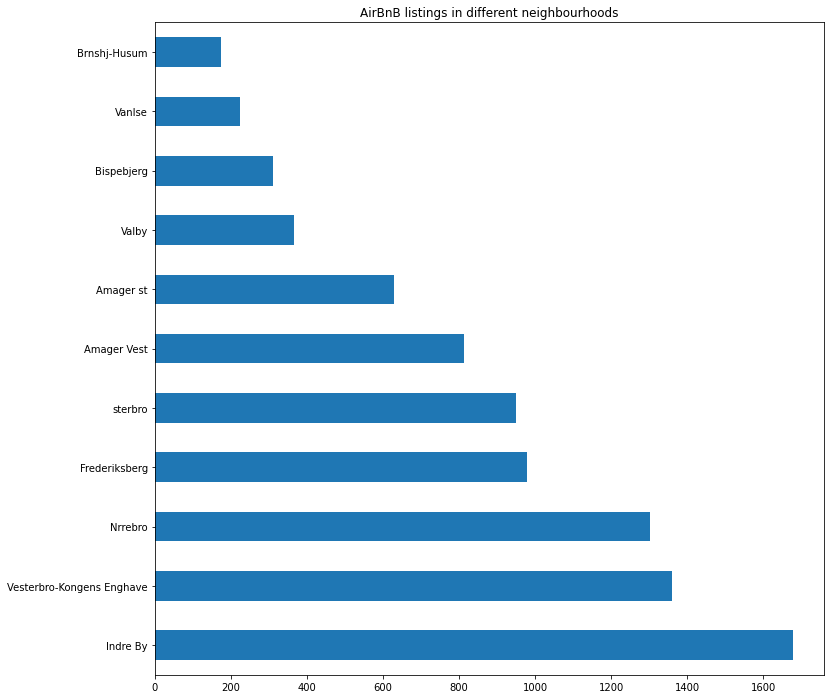

In [91]:
status_vals = df. neighbourhood.value_counts() #Provide a pandas series of the counts for each neighbourhood status
# The below should be a bar chart of the different neighbourhood in Copenhagen with AirBnB listings.
plt.figure(figsize=(12,12))
status_vals.plot(kind="barh")


plt.title("AirBnB listings in different neighbourhoods");

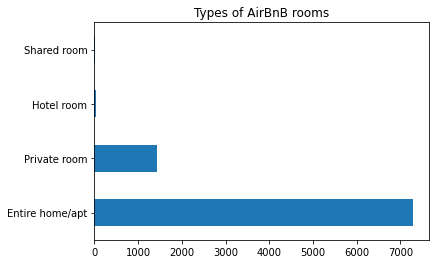

In [92]:
status_vals = df. room_type.value_counts() #Provide a pandas series of the counts for each room types
# The below should be a bar chart of the different roomtypes in Copenhagen for AirBnB listings.

status_vals.plot(kind="barh");
plt.title("Types of AirBnB rooms");

In [93]:

df["room_type"].value_counts()

Entire home/apt    7298
Private room       1438
Hotel room           31
Shared room          18
Name: room_type, dtype: int64

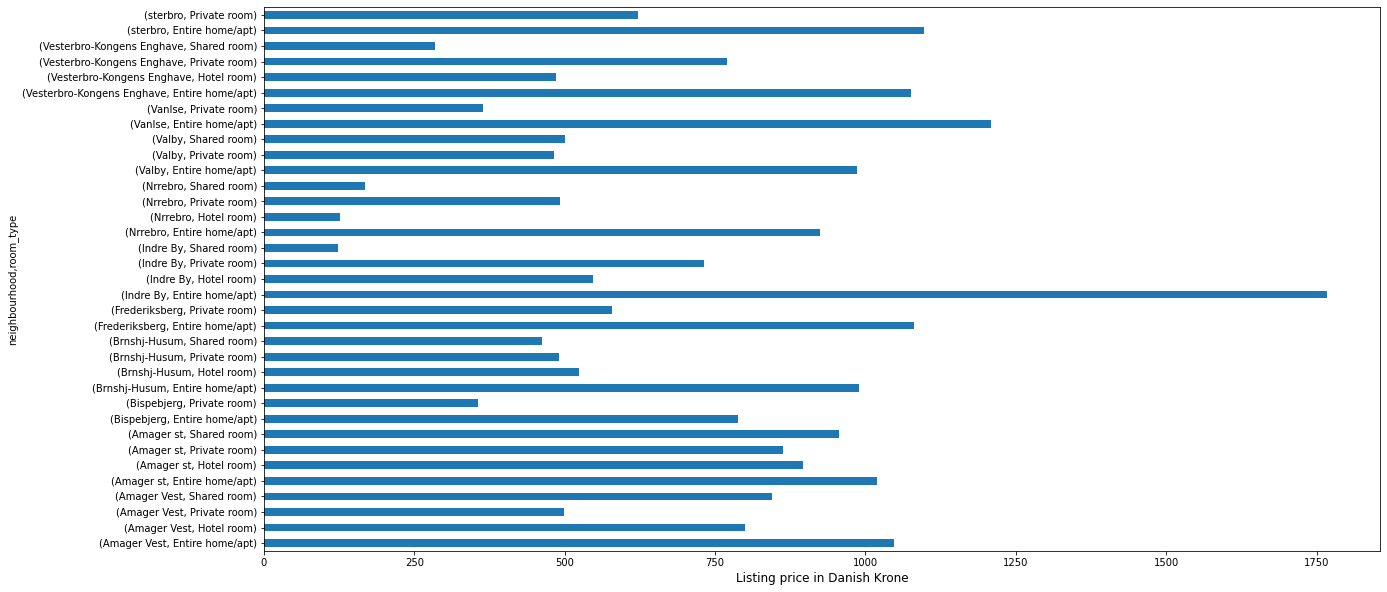

In [94]:
plt.figure(figsize=(12,12))
plt.ylabel('Count',fontsize = 10 )
plt.xlabel('Listing price in Danish Krone', fontsize = 12)
df.groupby(["neighbourhood", "room_type"]).mean()["price"].plot(kind = 'barh', figsize=(20,10))


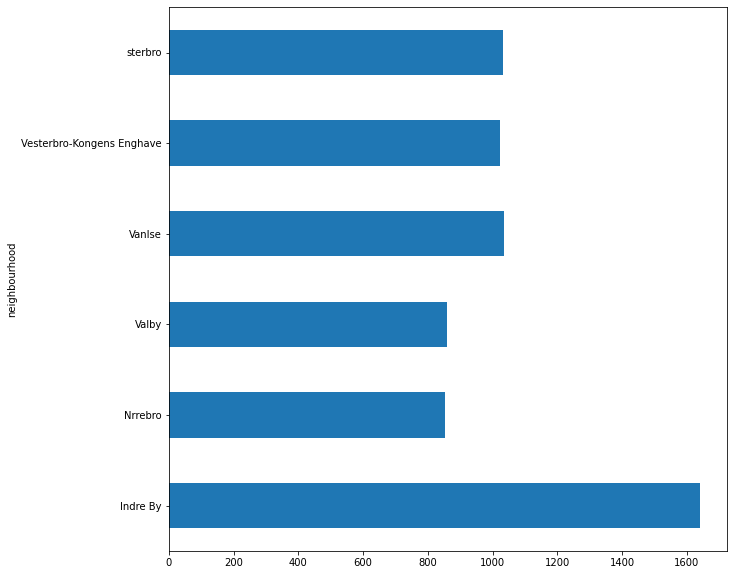

In [95]:
df.groupby(["neighbourhood",]).mean()["price"].iloc[5:].plot(kind = 'barh', figsize=(10,10))

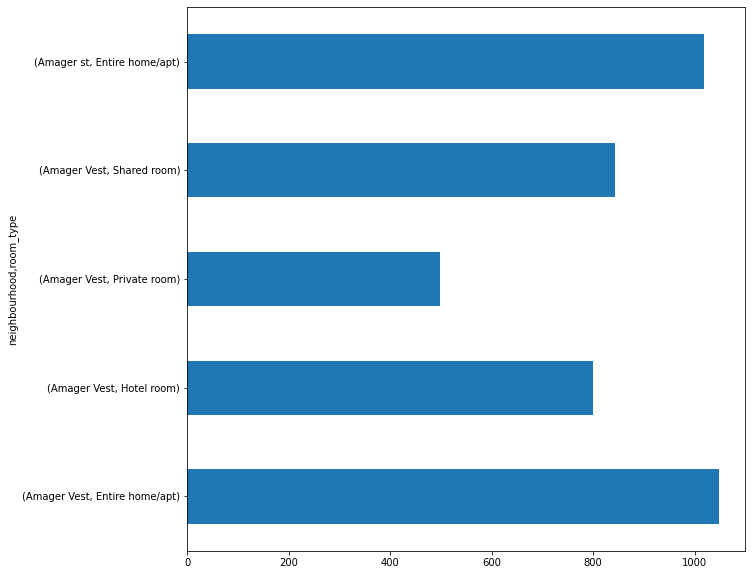

In [96]:
df.groupby(["neighbourhood", "room_type"]).mean()["price"].iloc[:5].plot(kind = 'barh', figsize=(10,10))

In [97]:
df.describe()


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8.785000e+03,8.785000e+03,0.0,8785.000000,8785.000000,8785.000000,8785.000000,8785.000000,7372.000000,8785.000000,8785.000000
mean,2.396404e+07,7.890915e+07,NaN,55.679729,12.560093,1081.823221,4.203187,20.936710,0.604079,6.899146,147.215595
std,1.478228e+07,9.392858e+07,NaN,0.018981,0.031733,2695.562235,13.999261,37.075553,0.818381,28.919422,134.868395
min,6.983000e+03,1.677400e+04,NaN,55.616420,12.454010,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.040420e+07,9.394081e+06,NaN,55.666480,12.543230,600.000000,2.000000,2.000000,0.170000,1.000000,15.000000
50%,2.490314e+07,3.410586e+07,NaN,55.680190,12.558600,846.000000,2.000000,8.000000,0.370000,1.000000,90.000000
75%,3.701247e+07,1.280741e+08,NaN,55.693790,12.581890,1175.000000,4.000000,24.000000,0.720000,1.000000,270.000000
max,4.831335e+07,3.899483e+08,NaN,55.732200,12.639800,156275.000000,600.000000,640.000000,21.250000,192.000000,365.000000


Part 2: Predicting prices.This will involve data wrangling and modeling.


In [98]:
df["price"].mean()

1081.8232214001139

In [99]:
df.groupby(['neighbourhood']).mean()['price'].sort_values()
df_format= "{:.1%}"



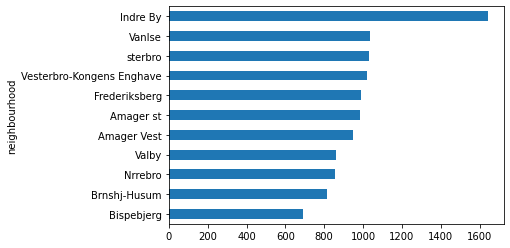

In [100]:
prices_neighbourhoods = df.groupby(['neighbourhood']).mean()['price'].sort_values()
(prices_neighbourhoods).plot(kind="barh");


plt.show()




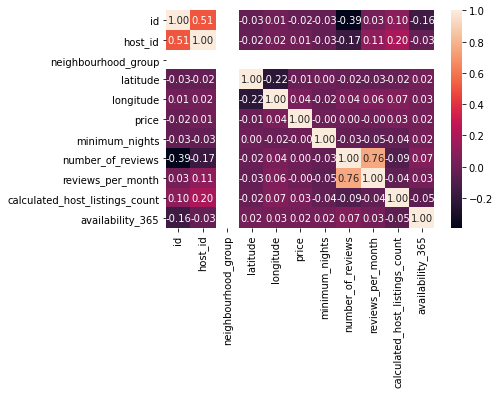

In [101]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

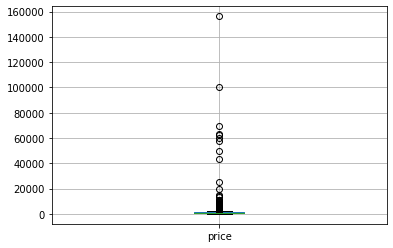

In [102]:
df[['price']].boxplot()

In [103]:
# Consider only numerical variables
#X = df[['number_of_reviews', 'reviews_per_month', 'minimum_nights']]
#y = df['price']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
##lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
#lm_model.fit(X_train, y_train) 

#Predict
#Score

The  above code breaks due to NaN values, we will work with  missing values before applying models in the following section.

In [104]:
#Check each column for NaN values
df['price'].isnull().sum()

0

In [105]:
df['number_of_reviews'].isnull().sum()

0

In [106]:
df['reviews_per_month'].isnull().sum()

1413

Finding the missing values and handling that. There are no categorical variables. There are 1413 missing values and hence we are choosing imputation over removing the values as we want to keep it unbiased. Dropping values isn't preferable in this case. Imputation means that you input a value for values that were originally missing.

It is very common to impute in the following ways:

Impute the mean of a column.


If you are working with categorical data or a variable with outliers, then use the mode of the column.


Impute 0, a very small number, or a very large number to differentiate missing values from other values.


Use knn to impute values based on features that are most similar.


In [107]:
missing = df['reviews_per_month'].isnull()
print(missing)

0       False
1       False
2       False
3       False
4       False
        ...  
8780     True
8781     True
8782     True
8783     True
8784     True
Name: reviews_per_month, Length: 8785, dtype: bool


In [108]:
new_df = df['reviews_per_month']#Finding out the missing values in the column.
print (new_df)

0       1.20
1       0.57
2       0.17
3       0.13
4       0.57
        ... 
8780     NaN
8781     NaN
8782     NaN
8783     NaN
8784     NaN
Name: reviews_per_month, Length: 8785, dtype: float64


In [109]:
num_vars = df[['price', 'number_of_reviews','reviews_per_month','minimum_nights']]


print(num_vars)

      price  number_of_reviews  reviews_per_month  minimum_nights
0       354                168               1.20               2
1      2400                 50               0.57               3
2       725                 22               0.17               7
3       750                 17               0.13               2
4       930                 73               0.57               3
...     ...                ...                ...             ...
8780    649                  0                NaN               1
8781    700                  0                NaN              28
8782    720                  0                NaN               2
8783    281                  0                NaN              14
8784    520                  0                NaN               3

[8785 rows x 4 columns]


In [110]:
fill_df = df ['reviews_per_month'].fillna((df['reviews_per_month'].mean()))#Filling the columns with mean
print (fill_df)

0       1.200000
1       0.570000
2       0.170000
3       0.130000
4       0.570000
          ...   
8780    0.604079
8781    0.604079
8782    0.604079
8783    0.604079
8784    0.604079
Name: reviews_per_month, Length: 8785, dtype: float64


In [111]:
num_vars = df[['price', 'number_of_reviews','reviews_per_month','minimum_nights']]
print(num_vars)

      price  number_of_reviews  reviews_per_month  minimum_nights
0       354                168               1.20               2
1      2400                 50               0.57               3
2       725                 22               0.17               7
3       750                 17               0.13               2
4       930                 73               0.57               3
...     ...                ...                ...             ...
8780    649                  0                NaN               1
8781    700                  0                NaN              28
8782    720                  0                NaN               2
8783    281                  0                NaN              14
8784    520                  0                NaN               3

[8785 rows x 4 columns]


In [112]:

drop_sal_df = num_vars.fillna((df['reviews_per_month'].mean()))

# test look
drop_sal_df
fill_mean = lambda col: col.fillna(col.mean()) # Mean function

fill_df = drop_sal_df.apply(fill_mean, axis=0) #Fill all missing values with the mean of the column.

# test look
fill_df

,price,number_of_reviews,reviews_per_month,minimum_nights
0,354,168,1.200000,2
1,2400,50,0.570000,3
2,725,22,0.170000,7
3,750,17,0.130000,2
4,930,73,0.570000,3
...,...,...,...,...
8780,649,0,0.604079,1
8781,700,0,0.604079,28
8782,720,0,0.604079,2
8783,281,0,0.604079,14


In [113]:
X = df[['number_of_reviews', 'reviews_per_month', 'minimum_nights']]
y = df['price']#Create y using the response variable of Salary

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

Oh no! It doesn't work!!!


In [114]:
df['minimum_nights'].isnull().sum()

0

In [115]:
prop_sals = 1- df.isnull()['reviews_per_month'].mean()  # Proportion of listings in the dataset with reviews_per_month reported

prop_sals

0.83915765509391

In [116]:
X = fill_df[['number_of_reviews', 'reviews_per_month', 'minimum_nights']]
y = fill_df['price']#Create y using the response variable of Salary

# Split data into training and test data, and fit a linear model
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
lm_model = LinearRegression(normalize=True)

# If our model works, it should just fit our model to the data. Otherwise, it will let us know.
try:
    lm_model.fit(X_train, y_train)
except:
    print("Oh no! It doesn't work!!!")

  

The above code worked!.

In [117]:
      
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
y_train_preds = lm_model.predict(X_train)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was -0.0030520727982148443 on 2636 values.'

In [118]:
   #Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.0004583209510600206.  The rsquared on the test data was -0.0030520727982148443.


The difference in the value is small and that means it is not overfitting.

In [119]:
(np.sum(df.price.notnull()))

8785

In [120]:
(len(y_test_preds))

2636

Text(0, 0.5, 'y_test_preds')

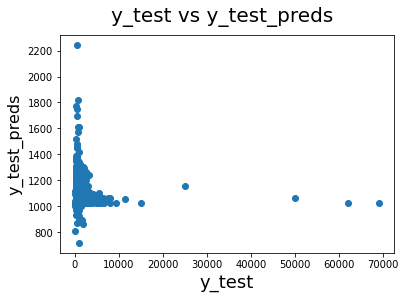

In [121]:
 #Plotting y_test and y_Test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_preds)
fig.suptitle('y_test vs y_test_preds', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_preds', fontsize=16)                          # Y-label
